# Grover's Algorithm

This notebook implements Grover's algorithm for solving unstructured search problems.

see [Grover’s Algorithm](https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm)

Code adapted from [QX08-GroversAlgorithm/QX08-GroversAlgorithm.ipynb at main · atilsamancioglu/QX08-GroversAlgorithm](https://github.com/atilsamancioglu/QX08-GroversAlgorithm/blob/main/QX08-GroversAlgorithm.ipynb)

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

## Classical Search

Implement a simple search algorithm to illustrate relationship with Grover's Algorithm

In [2]:
# init a simple list
lottery_list = [5,4,6,9,1,2,3,7,8,0]
winning_number = 8

In [4]:
def oracle(number):
    if number == winning_number:
        response = True
    else:
        response = False
    return response

for index, number in enumerate(lottery_list):
    if oracle(number) is True:
        print(f"winning number index: {index}")
        print(f"execution count: {index+1}")
        break

winning number index: 8
execution count: 9


## Grover's Algorithm

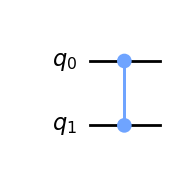

In [5]:
#Oracle Circuit (WinningNumber = 11)

oracleCircuit = QuantumCircuit(2,name='oracleCircuit')
oracleCircuit.cz(0,1)
oracleCircuit.to_gate()
oracleCircuit.draw(output='mpl')

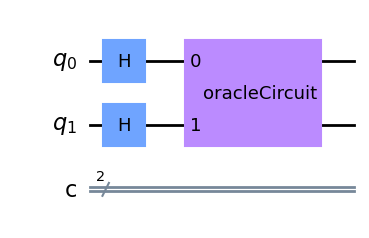

In [6]:
mainCircuit = QuantumCircuit(2,2)
mainCircuit.h([0,1])
mainCircuit.append(oracleCircuit,[0,1])
mainCircuit.draw(output='mpl')

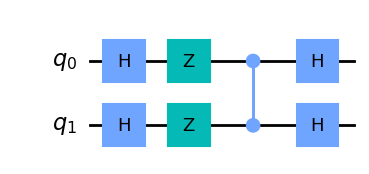

In [7]:
reflectionCircuit = QuantumCircuit(2,name="reflectionCircuit")
reflectionCircuit.h([0,1])
reflectionCircuit.z([0,1])
reflectionCircuit.cz(0,1)
reflectionCircuit.h([0,1])
reflectionCircuit.to_gate()
reflectionCircuit.draw(output='mpl')

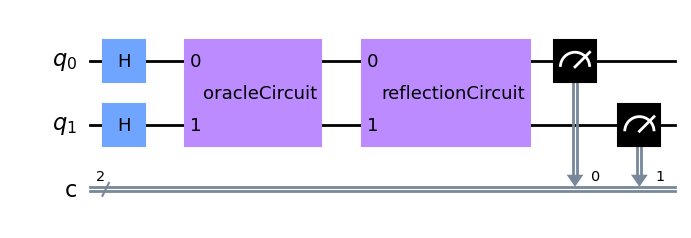

In [8]:
mainCircuit.append(reflectionCircuit,[0,1])
mainCircuit.measure([0,1],[0,1])
mainCircuit.draw(output='mpl')

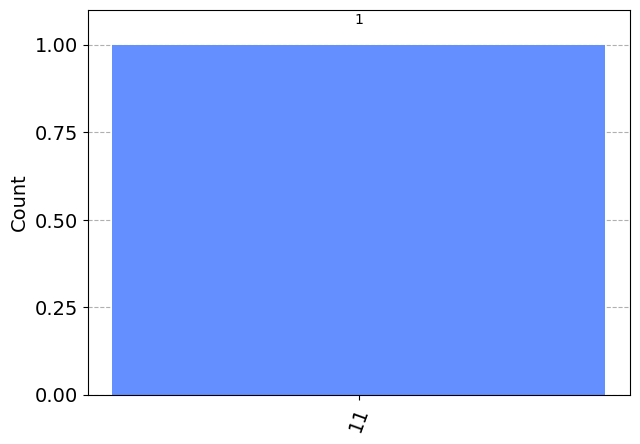

In [9]:
backend = Aer.get_backend('qasm_simulator')
result = execute(mainCircuit,backend=backend,shots=1).result()
counts = result.get_counts(mainCircuit)
plot_histogram([counts])